Processing pt bin 0 with range [0, 1]
ef_ref: 3, 	pure_ref: 0, 	total: 21
ef_ref: 5, 	pure_ref: 0, 	total: 33
Processing pt bin 1 with range [1, 2]
ef_ref: 20, 	pure_ref: 0, 	total: 148
ef_ref: 19, 	pure_ref: 0, 	total: 148
Processing pt bin 2 with range [2, 3]
ef_ref: 41, 	pure_ref: 3, 	total: 286
ef_ref: 40, 	pure_ref: 2, 	total: 228
Processing pt bin 3 with range [3, 4]
ef_ref: 49, 	pure_ref: 1, 	total: 291
ef_ref: 60, 	pure_ref: 3, 	total: 216
Processing pt bin 4 with range [4, 5]
ef_ref: 56, 	pure_ref: 2, 	total: 212
ef_ref: 50, 	pure_ref: 3, 	total: 184
Processing pt bin 5 with range [5, 6]
ef_ref: 46, 	pure_ref: 1, 	total: 145
ef_ref: 33, 	pure_ref: 1, 	total: 137
Processing pt bin 6 with range [6, 7]
ef_ref: 40, 	pure_ref: 0, 	total: 124
ef_ref: 40, 	pure_ref: 1, 	total: 121
Processing pt bin 7 with range [7, 8]
ef_ref: 28, 	pure_ref: 1, 	total: 85
ef_ref: 38, 	pure_ref: 4, 	total: 123
Processing pt bin 8 with range [8, 10]
ef_ref: 63, 	pure_ref: 0, 	total: 180
ef_ref: 89, 	pur

Info in <TCanvas::Print>: png file /home/wuct/ALICE/local/Results/checks/ML/inputDistr/pure_reflection/input2_set_no_filter/Reflection/sig_comp_0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: sig_comp_canvas
Info in <TCanvas::Print>: png file /home/wuct/ALICE/local/Results/checks/ML/inputDistr/pure_reflection/input2_set_no_filter/Reflection/sig_comp_1.png has been created


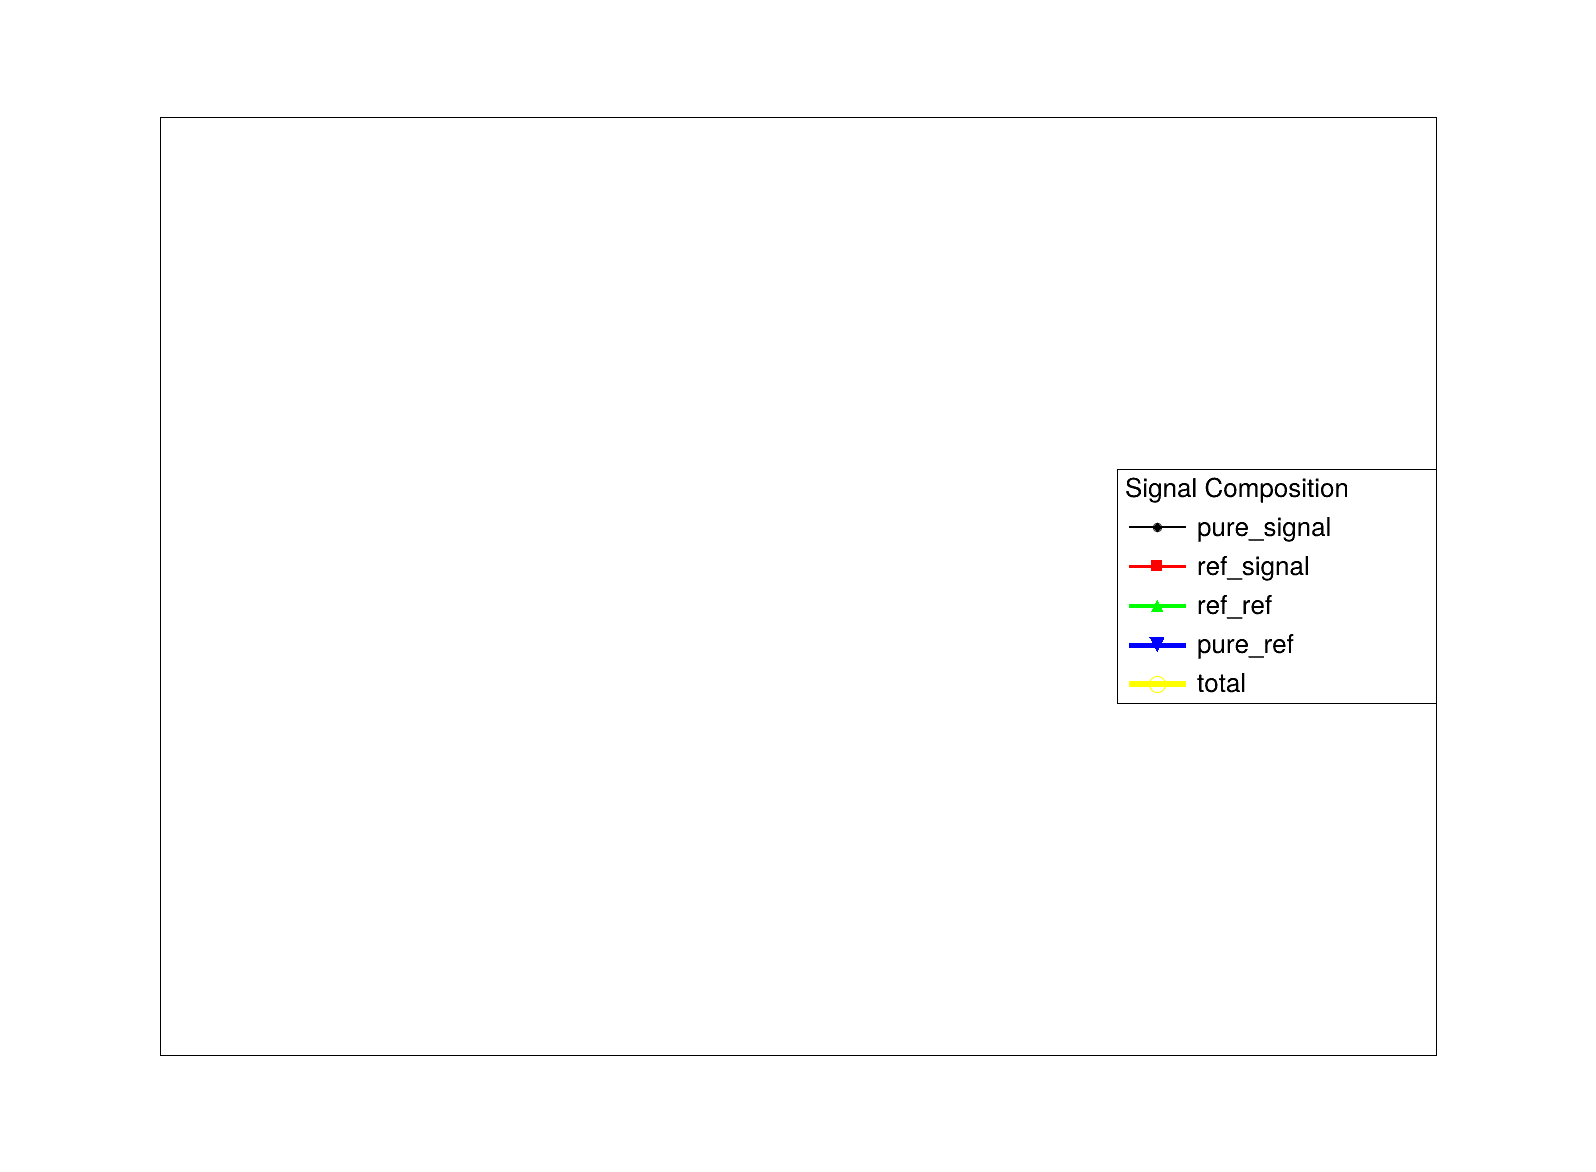

In [1]:
from inputDistribution import main
import yaml

with open("./config_input_distr_pure_reflection.yml", "r") as file:
    config = yaml.safe_load(file)
    functions = config["func"]
    for function in functions:
        if function == "reflection":
            config["func"][function]=True
        else:
            config["func"][function]=False
    ptRanges = config["pt_ranges"]

sig_comp = main(config)

# print(sig_comp)

import ROOT
from ROOT import TFile, TH1F, TCanvas, TLegend
import numpy as np

subBin = ["pure_signal", "ref_signal", "ref_ref", "pure_ref", "total"]
# Save the results to a ROOT file
output_file = TFile("/home/wuct/ALICE/local/Results/checks/ML/inputDistr/pure_reflection/input1_set/Reflection/sig_comp.root", "RECREATE")

ptmins = ptRanges["min"]
ptmaxs = ptRanges["max"]
ptBins = ptmins + [ptmaxs[-1]]
ptBins_array = np.array(ptBins, dtype=np.float64)  # Convert ptBins to a NumPy array of type float64

sig_comp_hists = []
leg = TLegend(0.7, 0.4, 0.9, 0.6)
leg.SetHeader("Signal Composition")
# for iSubBin, sub_bin in enumerate(subBin):
#     leg.AddEntry(f"sig_comp_{sub_bin}", sub_bin, "l")
for iSubBin, sub_bin in enumerate(subBin):

    hist = TH1F(f"sig_comp_{sub_bin}", '', len(ptBins) - 1, ptBins_array)
    hist.GetXaxis().SetTitle("pT bin")
    hist.GetYaxis().SetTitle("Number of candidates")
    hist.SetStats(0)
    hist.SetLineColor(iSubBin + 1)
    hist.SetLineWidth(2 + iSubBin)
    hist.SetMarkerSize(1.2 + iSubBin * 0.2)
    hist.SetMarkerStyle(20 + iSubBin)
    hist.SetMarkerColor(iSubBin + 1)
    leg.AddEntry(hist, sub_bin, "lp")
    sig_comp_hists.append(hist)

for iOrig in range(2):
    for iPtKey, ptValue in sig_comp.items():
        iCompKey = 0
        for CompKey, compValue in ptValue[iOrig].items():
            bin_index = iPtKey + 1
            sig_comp_hists[iCompKey].SetBinContent(bin_index, len(compValue))
            iCompKey += 1
    canvas = TCanvas("sig_comp_canvas", "Signal Composition", 1600, 1200)
    for hist in sig_comp_hists:
        hist.SetMinimum(0.9)
        hist.SetMaximum(1.2 * max(hist.GetMaximum() for hist in sig_comp_hists))
        hist.Draw("SAME")
    canvas.SetTitle(f"Signal Composition for Original {iOrig}")
    canvas.Draw()
    leg.Draw()
    canvas.SetLogy()
    canvas.Update()
    canvas.Write()
    canvas.SaveAs(f"/home/wuct/ALICE/local/Results/checks/ML/inputDistr/pure_reflection/input2_set_no_filter/Reflection/sig_comp_{iOrig}.png")
    # Write the histograms to the ROOT file
    for hist in sig_comp_hists:
        hist.SetName(f"sig_comp_{hist.GetName()}_{iOrig}")
        hist.Write()
    # Close the ROOT file
output_file.Close()

# # Create a histogram with 4 sub-bins per bin
# sig_comp_hists = []
# for iOrig in range(2):
#     hist = TH1F(f"sig_comp_{iOrig}", f"Signal Composition {iOrig}", len(sig_comp) * 4, 0, len(sig_comp))
#     for iPt in range(len(sig_comp)):
#         for iSubBin, sub_bin in enumerate(subBin):
#             bin_label = f"{iPt+1}-{sub_bin}"
#             hist.GetXaxis().SetBinLabel(iPt * 4 + iSubBin + 1, bin_label)
#     sig_comp_hists.append(hist)

# for iOrig in range(2):
#     for iPtKey, ptValue in sig_comp.items():
#         iCompKey = 0
#         for CompKey, compValue in ptValue[iOrig].items():
#             bin_index = iPtKey * 4 + iCompKey + 1
#             sig_comp_hists[iOrig].SetBinContent(bin_index, len(compValue))
#             iCompKey += 1
# canvas = TCanvas("sig_comp_canvas", "Signal Composition", 800, 600)
# for hist in sig_comp_hists:
#     hist.Draw()
# canvas.Draw()
# # Write the histograms to the ROOT file
# for hist in sig_comp_hists:
#     hist.Write()
# # Close the ROOT file
# output_file.Close()